In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL # Image Library in Python
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
# Download the flowers dataset from google's website
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

In [3]:
data_dir

'./datasets/flower_photos'

In [4]:
# We have 5 types of different flowers
# Convert the data_dir into pathlib
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [5]:
# Now we can list the images with 'jpg' format
list(data_dir.glob('*/*.jpg'))

[PosixPath('datasets/flower_photos/dandelion/18996965033_1d92e5c99e.jpg'),
 PosixPath('datasets/flower_photos/dandelion/11775820493_10fedf4bff_n.jpg'),
 PosixPath('datasets/flower_photos/dandelion/18999743619_cec3f39bee.jpg'),
 PosixPath('datasets/flower_photos/dandelion/8209318399_ae72aefdb5.jpg'),
 PosixPath('datasets/flower_photos/dandelion/4528742654_99d233223b_m.jpg'),
 PosixPath('datasets/flower_photos/dandelion/16953818045_fea21c8bf8.jpg'),
 PosixPath('datasets/flower_photos/dandelion/16242239484_51286673af.jpg'),
 PosixPath('datasets/flower_photos/dandelion/19506262462_d0945c14a6.jpg'),
 PosixPath('datasets/flower_photos/dandelion/7249354462_21925f7d95_n.jpg'),
 PosixPath('datasets/flower_photos/dandelion/2133943140_9fc7bcc9aa.jpg'),
 PosixPath('datasets/flower_photos/dandelion/3662701865_3ff283a33a_n.jpg'),
 PosixPath('datasets/flower_photos/dandelion/2596413098_7ef69b7e1d_m.jpg'),
 PosixPath('datasets/flower_photos/dandelion/18970601002_d70bc883a9.jpg'),
 PosixPath('datasets/

In [6]:
# Now we can list the images with 'jpg' format
len(list(data_dir.glob('*/*.jpg'))) # We have total of 3670 images

3670

In [7]:
# for checking the Roses
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/4061451210_1650590c6a.jpg'),
 PosixPath('datasets/flower_photos/roses/8742493689_fb852f0228_n.jpg'),
 PosixPath('datasets/flower_photos/roses/9702378513_229a96b754_m.jpg'),
 PosixPath('datasets/flower_photos/roses/21413573151_e681c6a97a.jpg'),
 PosixPath('datasets/flower_photos/roses/8036594516_69a7da5f73_m.jpg')]

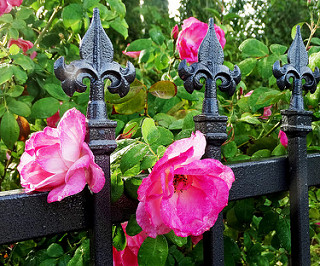

In [8]:
# Display image using the PIL
PIL.Image.open(str(roses[5]))

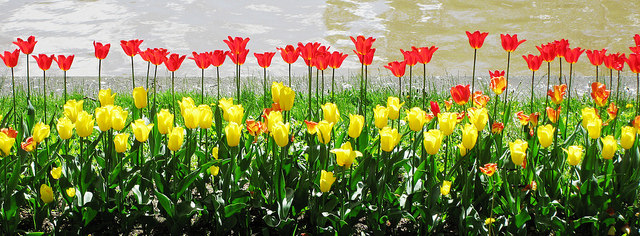

In [9]:
# TO check the tulips
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[3]))

In [10]:
# Create a dictionary of flowers and all the image path associated with it
# This will help during model building process
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [11]:
flowers_images_dict['roses']

[PosixPath('datasets/flower_photos/roses/4061451210_1650590c6a.jpg'),
 PosixPath('datasets/flower_photos/roses/8742493689_fb852f0228_n.jpg'),
 PosixPath('datasets/flower_photos/roses/9702378513_229a96b754_m.jpg'),
 PosixPath('datasets/flower_photos/roses/21413573151_e681c6a97a.jpg'),
 PosixPath('datasets/flower_photos/roses/8036594516_69a7da5f73_m.jpg'),
 PosixPath('datasets/flower_photos/roses/17302463621_d82be11f01_n.jpg'),
 PosixPath('datasets/flower_photos/roses/8523394349_61b31fdd8f_m.jpg'),
 PosixPath('datasets/flower_photos/roses/3997609936_8db20b7141_n.jpg'),
 PosixPath('datasets/flower_photos/roses/12240165555_98625b1e88_n.jpg'),
 PosixPath('datasets/flower_photos/roses/8960904651_9a0b727258.jpg'),
 PosixPath('datasets/flower_photos/roses/2273917656_6d6c038283.jpg'),
 PosixPath('datasets/flower_photos/roses/14019883858_e5d2a0ec10_n.jpg'),
 PosixPath('datasets/flower_photos/roses/9216321995_83df405ea9.jpg'),
 PosixPath('datasets/flower_photos/roses/16339359979_6d742660b8_n.jpg'

In [12]:
## Labels dictionary
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [13]:
flowers_images_dict['roses'][0]

PosixPath('datasets/flower_photos/roses/4061451210_1650590c6a.jpg')

In [14]:
# We can use the CV module to read this image file as opencv object which is a kind of numpy array
img = cv2.imread(str(flowers_images_dict['roses'][0])) #giving a single file path
img ## we got the numpy array for the 1st flower

array([[[ 49,  58,  95],
        [ 49,  59,  93],
        [ 50,  61,  93],
        ...,
        [ 67,  80, 112],
        [ 63,  75, 109],
        [ 61,  73, 107]],

       [[ 49,  59,  93],
        [ 50,  61,  93],
        [ 50,  64,  93],
        ...,
        [ 70,  83, 115],
        [ 66,  79, 111],
        [ 64,  76, 110]],

       [[ 48,  61,  93],
        [ 50,  64,  93],
        [ 52,  66,  94],
        ...,
        [ 72,  88, 117],
        [ 67,  82, 114],
        [ 65,  80, 112]],

       ...,

       [[ 55,  66,  98],
        [ 58,  69, 101],
        [ 61,  70, 103],
        ...,
        [ 64,  75, 107],
        [ 61,  72, 104],
        [ 59,  69, 103]],

       [[ 53,  64,  96],
        [ 55,  66,  98],
        [ 58,  67, 100],
        ...,
        [ 62,  73, 105],
        [ 59,  70, 102],
        [ 57,  67, 101]],

       [[ 51,  62,  94],
        [ 53,  64,  96],
        [ 55,  64,  97],
        ...,
        [ 59,  70, 102],
        [ 56,  66, 100],
        [ 54,  64,  98]]

In [15]:
# check the shape of the image
img.shape # 3 dimensional -- 3rd for RGB channel

(333, 500, 3)

In [16]:
# OpenCV also has a function called resize
# we can resize the image into some standard size
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [17]:
# Let's run a for loop and prepare the X and y
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180)) # we are resizing the image because the model excepts the resized image
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name]) # we are giving the number for y from the dictionary that we created already

In [18]:
y[:5]

[0, 0, 0, 0, 0]

In [19]:
# convert the X and y into simple numpy array
X = np.array(X)
y = np.array(y)

In [20]:
#Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [21]:
# Preprocessing: scale images
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [22]:
# Build convolutional neural network and train it

num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'), # Con layer -- 16 filters and the size is 3 x 3
  layers.MaxPooling2D(),                                   # Pooling layer
  layers.Conv2D(32, 3, padding='same', activation='relu'), # Con layer -- 32 filters and the size is 3 x 3
  layers.MaxPooling2D(),                                   # Pooling layer
  layers.Conv2D(64, 3, padding='same', activation='relu'), # Con layer -- 64 filters and the size is 3 x 3
  layers.MaxPooling2D(),                                   # Pooling layer
  layers.Flatten(), # flattern the array
  layers.Dense(128, activation='relu'), # Dense network with 128 neurons
  layers.Dense(num_classes) # since we have 5 flowers we are specifying the number of classes as 5
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), # since the y is not hot encoded, we will use as it is
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30
86/86 [==============================] - 7s 24ms/step - loss: 1.3468 - accuracy: 0.4226
Epoch 2/30
86/86 [==============================] - 2s 20ms/step - loss: 0.9673 - accuracy: 0.6235
Epoch 3/30
86/86 [==============================] - 2s 19ms/step - loss: 0.7893 - accuracy: 0.6937
Epoch 4/30
86/86 [==============================] - 2s 19ms/step - loss: 0.5931 - accuracy: 0.7802
Epoch 5/30
86/86 [==============================] - 2s 19ms/step - loss: 0.3725 - accuracy: 0.8674
Epoch 6/30
86/86 [==============================] - 2s 19ms/step - loss: 0.2169 - accuracy: 0.9310
Epoch 7/30
86/86 [==============================] - 2s 19ms/step - loss: 0.1059 - accuracy: 0.9727
Epoch 8/30
86/86 [==============================] - 2s 21ms/step - loss: 0.0644 - accuracy: 0.9822
Epoch 9/30
86/86 [==============================] - 2s 21ms/step - loss: 0.0440 - accuracy: 0.9884
Epoch 10/30
86/86 [==============================] - 2s 20ms/step - loss: 0.0526 - accuracy: 0.9833
Epoch 11/

In [23]:
# We got the training accuracy as 100% lets evaluate the model with test samples
model.evaluate(X_test_scaled,y_test)
# But our evaluation got only 63% of the accuracy
# This is an example of an overfitting


29/29 [==============================] - 1s 14ms/step - loss: 3.4959 - accuracy: 0.6307


[3.4958643913269043, 0.6307189464569092]

In [27]:
# Check the predictions
predictions = model.predict(X_test_scaled)
predictions

29/29 [==============================] - 0s 11ms/step


array([[ 11.143143  ,   4.454735  ,  -7.70928   ,   4.701866  ,
        -12.437534  ],
       [ -3.6576383 ,  -7.9488873 ,   6.2089167 ,  15.231632  ,
         -4.944386  ],
       [  4.8745713 ,   0.77431285,   7.1403117 ,  -8.594321  ,
          0.3213419 ],
       ...,
       [ -6.1022596 ,   9.143526  ,  -2.423875  ,  -6.8832345 ,
         10.424717  ],
       [ -2.222627  ,  -1.4294726 ,   2.6615803 , -11.83262   ,
         15.407768  ],
       [ -7.701709  , -19.69607   ,   8.64402   ,  20.321146  ,
          5.3025956 ]], dtype=float32)

In [29]:
# Converting the value into some understandable score
score = tf.nn.softmax(predictions[0]) # here we are using the softmax function to convert the values into some probability
score # we got some tensor

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([9.9716836e-01, 1.2417376e-03, 6.4753816e-09, 1.5898553e-03,
       5.7254621e-11], dtype=float32)>

In [30]:
# Now we can use the numpy argmax function for converting it into understandable output
np.argmax(score)

0

In [31]:
y_test[0]

1

## Improve Test Accuracy Using Data Augmentation

In [45]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal"),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

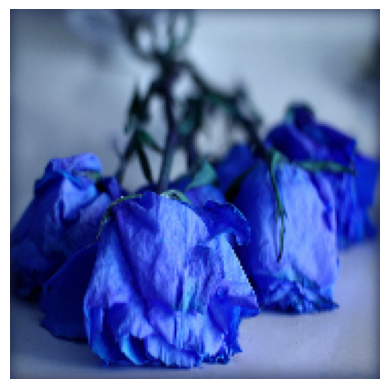

In [32]:
# plot the image from training set
# Original Image

plt.axis('off')
plt.imshow(X[0])

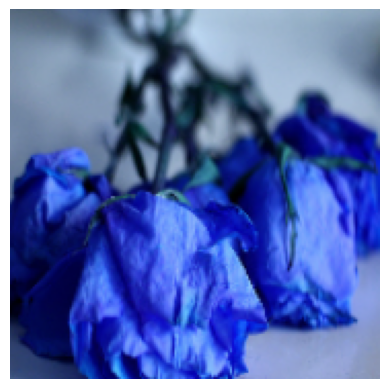

In [37]:
# Newly generated training sample using data augmentation

plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

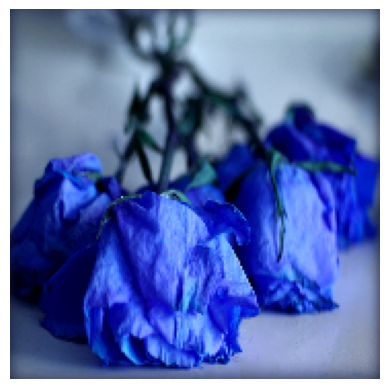

In [40]:
# for checking the random contrast
# Newly generated training sample using data augmentation

plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

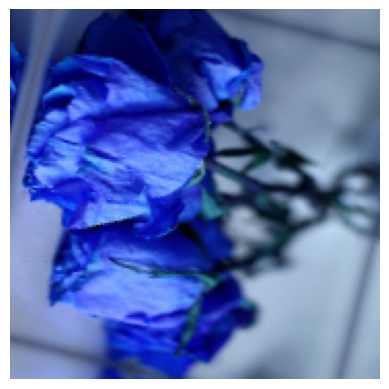

In [42]:
# for checking the random rotation
# Newly generated training sample using data augmentation

plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

In [46]:
# Train the model using data augmentation and a drop out layer
num_classes = 5

model = Sequential([
  data_augmentation, # Data augmentation as the 1st layer
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2), # Drop 20% of the neurons at random
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30
86/86 [==============================] - 6s 28ms/step - loss: 1.5538 - accuracy: 0.3103
Epoch 2/30
86/86 [==============================] - 2s 27ms/step - loss: 1.1805 - accuracy: 0.5116
Epoch 3/30
86/86 [==============================] - 2s 28ms/step - loss: 1.0515 - accuracy: 0.5792
Epoch 4/30
86/86 [==============================] - 2s 27ms/step - loss: 0.9711 - accuracy: 0.6257
Epoch 5/30
86/86 [==============================] - 2s 26ms/step - loss: 0.8936 - accuracy: 0.6493
Epoch 6/30
86/86 [==============================] - 2s 26ms/step - loss: 0.8618 - accuracy: 0.6639
Epoch 7/30
86/86 [==============================] - 2s 27ms/step - loss: 0.8076 - accuracy: 0.6900
Epoch 8/30
86/86 [==============================] - 2s 28ms/step - loss: 0.8009 - accuracy: 0.7002
Epoch 9/30
86/86 [==============================] - 2s 29ms/step - loss: 0.7295 - accuracy: 0.7202
Epoch 10/30
86/86 [==============================] - 2s 26ms/step - loss: 0.7235 - accuracy: 0.7235
Epoch 11/

In [47]:
# Evaluate the model
model.evaluate(X_test_scaled,y_test)
# We got the accuracy of 74% which is huge improvement from 65%

29/29 [==============================] - 1s 12ms/step - loss: 0.8708 - accuracy: 0.7451


[0.8707754015922546, 0.7450980544090271]